In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset_1.csv', index_col = 0)
df.head()

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561


In [4]:
X = df.values
X

array([[ 0.68026725, -0.01634235],
       [ 3.80951844,  0.79848348],
       [-1.6613724 , -0.57766695],
       ...,
       [-5.86152028,  3.06842556],
       [-5.01893361,  3.11090369],
       [-6.79933099,  2.08232074]])

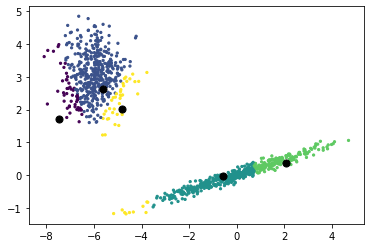

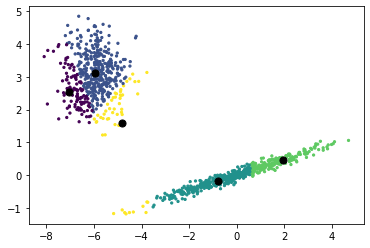

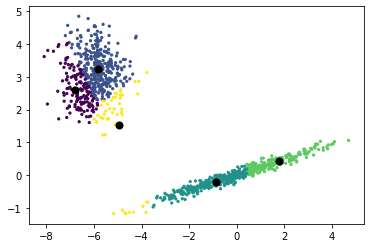

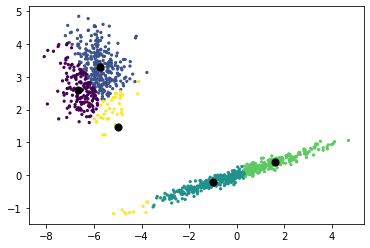

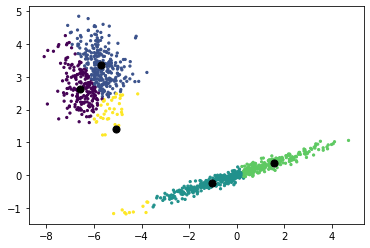

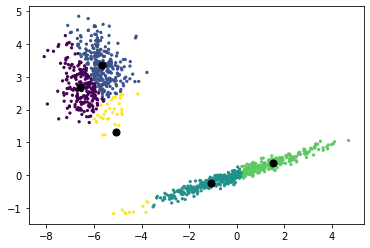

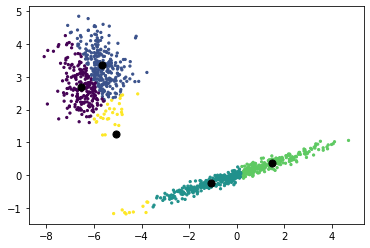

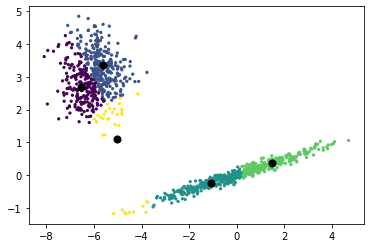

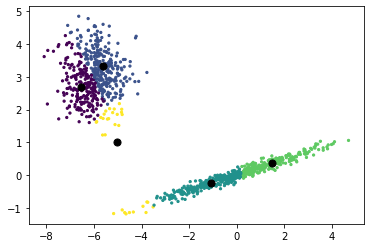

In [9]:
class Kmeans:
    def __init__(self, n_centroid):
        self.n_centroid = n_centroid
        self.labels = None
        self.centroids = None
        
    def generate_n_centroid(self, X):
        """
        retourn les coordinées d'un centroid choisit aléatoirement dans X
        dist = np.linalg.norm(X-centroid1)
        """
        indices = np.random.choice(X.shape[0], size = self.n_centroid, replace = False)

        self.centroids = X[indices]
        return self.centroids

    def generate_label(self, X):
        """
        Pour chaque centroid, retourne la distance est calculé
        retourn le label de chaque point : une array qui va être un vecteur (array numpy one dimension), [0,1,0,1,0,1,1,0,1,0....]
        """
        def compute_d(X, centroid):
            dist = (X - centroid)**2
            dist = np.sum(dist, axis=1)
            dist = np.sqrt(dist)
            return dist
        list_dist = [compute_d(X, centroid) for centroid in self.centroids]
        numpy_dist = np.asarray(list_dist, dtype=np.float32).transpose()
        self.label = np.argmin(numpy_dist, axis=1)       
        return self.label
    
    def plot_graph(self, X):
        """
        retourn rien, affiche le graphe avec en coloration différente les clusters

        """
        plt.scatter(X[:,0], X[:,1], s=5, c=self.label)
        for centroid in self.centroids:
            plt.scatter(centroid[0], centroid[1], c="black", s=50)
        plt.show()
        
    def compute_new_cendroid_position(self, X):
        """
        retourn la position des nouveaux cenroids

        """
        new_cent = [np.mean(X[self.label==i], axis = 0) for i in range(self.n_centroid)]
        self.new_centroids = np.asarray(new_cent)
        return self.new_centroids
    
    def fit(self, X):
        self.generate_n_centroid(X)
        self.generate_label(X)
        self.plot_graph(X)
        self.compute_new_cendroid_position(X)

        while (self.centroids != self.new_centroids).all():
            self.centroids = self.new_centroids
            self.label = self.generate_label(X)
            self.compute_new_cendroid_position(X)
            self.plot_graph(X)

kmeans = Kmeans(5)
kmeans.fit(X)